In [157]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor


%matplotlib inline

INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Mask wearing over 70%                      0.000 ... 0.081 ... 1.000 ... [0. 1.]
 2 Gatherings limited to 10                   0.000 ... 0.126 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 100                  0.000 ... 0.230 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 1000                 0.000 ... 0.257 ... 1.000 ... [0. 1.]
 5 Business suspended - some                  0.000 ... 0.245 ... 1.000 ... [0. 1.]
 6 Business suspended - many                  0.000 ... 0.179 ... 1.000 ... [0. 1.]
 7 Schools and universities closed            0.000 ... 0.336 ... 1.000 ... [0. 1.]
 8 General curfew                             0.000 ... 0.129 ... 1.

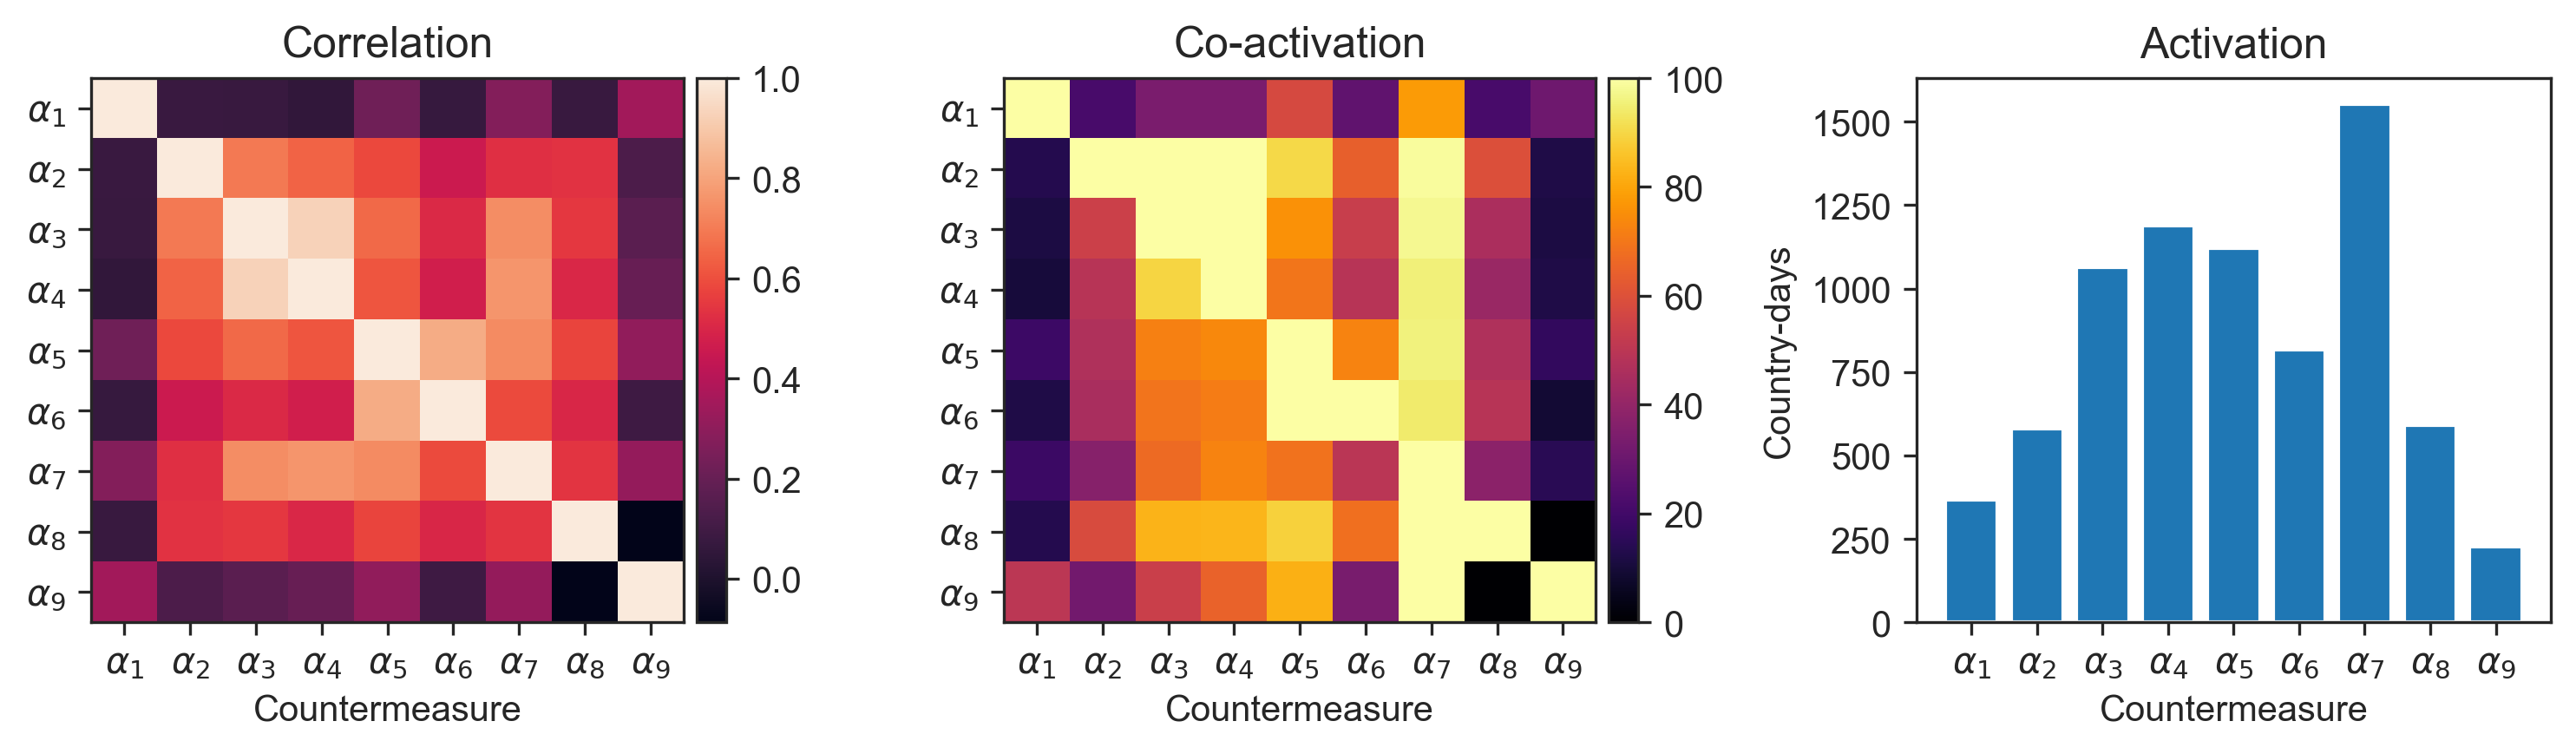

In [159]:
regions = ['AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SI', 'SK']
# Same, outside Europe
regions += ['AD', 'CN-HK', 'EG', 'IL', 'JP', 'KR', 'MX', 'SG', 'MY', 'MA', 'ZA', 'TW']


features = [
 'Mask wearing over 70%',
 'Gatherings limited to 10',
 'Gatherings limited to 100',
 'Gatherings limited to 1000',
 'Business suspended - some',
 'Business suspended - many',
 'Schools and universities closed',
 'General curfew',
 'Healthcare specialisation']

dp = DataPreprocessor(end_date="2020-04-21")
data = dp.preprocess_data("../../data", regions, features, selected_cm_set="countermeasures-model-boolean_Gat3Bus2SchCurHespMa.csv")

In [160]:
dp.CM_dataset

,,Gatherings limited to 10,Gatherings limited to 100,Gatherings limited to 1000,Business suspended - some,Business suspended - many,Schools and universities closed,General curfew,Healthcare specialisation,Mask wearing over 70%
Code,Date,,,,,,,,,
AT,2019-12-18 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DE,2019-12-18 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GB,2019-12-18 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KR,2019-12-18 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SG,2019-12-18 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
ZA,2020-04-23 00:00:00+00:00,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
BR,2020-04-23 00:00:00+00:00,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
NaN,2020-04-23 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [161]:
regions = np.array([ val[0] for val in dp.CM_dataset.index.values])
unique_regions = np.unique(regions).tolist()
print(f"Unique Regions: {unique_regions}")

Unique Regions: ['AD', 'AF', 'AL', 'AT', 'AU', 'BA', 'BE', 'BG', 'BR', 'BY', 'CA', 'CH', 'CN', 'CN-HK', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GE', 'GR', 'HR', 'HU', 'IE', 'IL', 'IQ', 'IR', 'IS', 'IT', 'JP', 'KR', 'KZ', 'LT', 'LU', 'LV', 'MA', 'MC', 'MD', 'ME', 'MK', 'MT', 'MX', 'NL', 'NO', 'NP', 'PL', 'PT', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK', 'SM', 'TR', 'TW', 'UA', 'UG', 'US', 'ZA', 'nan']


In [162]:
print(f"Features with nan: {np.sum(dp.CM_dataset.loc[np.nan, :].values, axis=0)}")
dp.CM_dataset.loc[np.nan, :]

Features with nan: [ 0.  0.  0.  0.  0. 40.  0.  0.  0.]


,Gatherings limited to 10,Gatherings limited to 100,Gatherings limited to 1000,Business suspended - some,Business suspended - many,Schools and universities closed,General curfew,Healthcare specialisation,Mask wearing over 70%
Date,,,,,,,,,
2019-12-18 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-19 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-20 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-21 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-22 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-04-19 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-04-20 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-04-21 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [166]:
jh_regions = np.unique([r[0] for r in dp.johnhop_ds.index]).tolist()
print(f"jh regions: {jh_regions}")

jh regions: ['AD', 'AE', 'AF', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU-ACT', 'AU-NSW', 'AU-NT', 'AU-QLD', 'AU-SA', 'AU-TAS', 'AU-VIC', 'AU-WA', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CA-AB', 'CA-BC', 'CA-MB', 'CA-NB', 'CA-NL', 'CA-NS', 'CA-NT', 'CA-ON', 'CA-PE', 'CA-QC', 'CA-SK', 'CA-YT', 'CD', 'CF', 'CG', 'CH', 'CI', 'CL', 'CM', 'CN-AH', 'CN-BJ', 'CN-CQ', 'CN-FJ', 'CN-GD', 'CN-GS', 'CN-GX', 'CN-GZ', 'CN-HA', 'CN-HB', 'CN-HE', 'CN-HI', 'CN-HK', 'CN-HL', 'CN-HN', 'CN-JL', 'CN-JS', 'CN-JX', 'CN-LN', 'CN-MO', 'CN-NM', 'CN-NX', 'CN-QH', 'CN-SC', 'CN-SD', 'CN-SH', 'CN-SN', 'CN-SX', 'CN-TJ', 'CN-XJ', 'CN-XZ', 'CN-YN', 'CN-ZJ', 'CO', 'CR', 'CU', 'CV', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'EH', 'ER', 'ES', 'ET', 'FI', 'FJ', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JM', 'JO', 'JP', '

# selected countries and features first

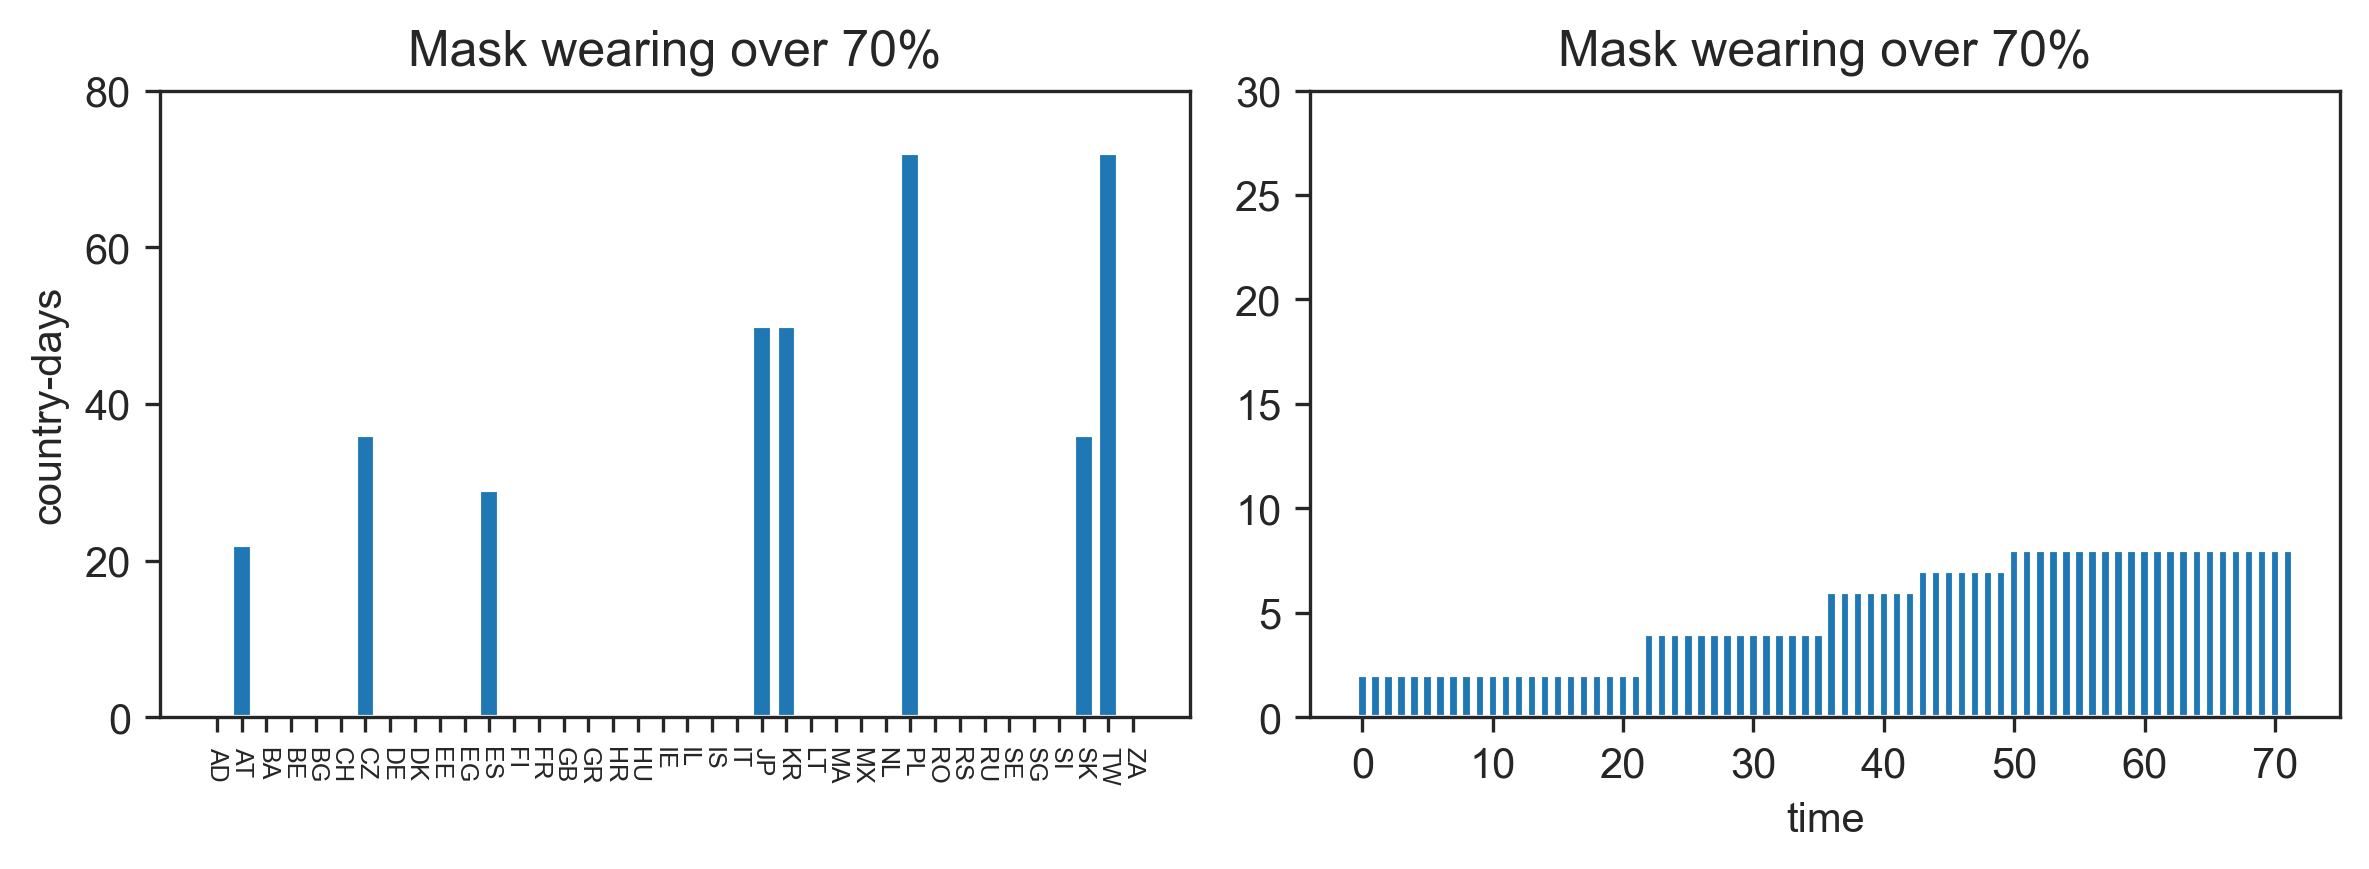

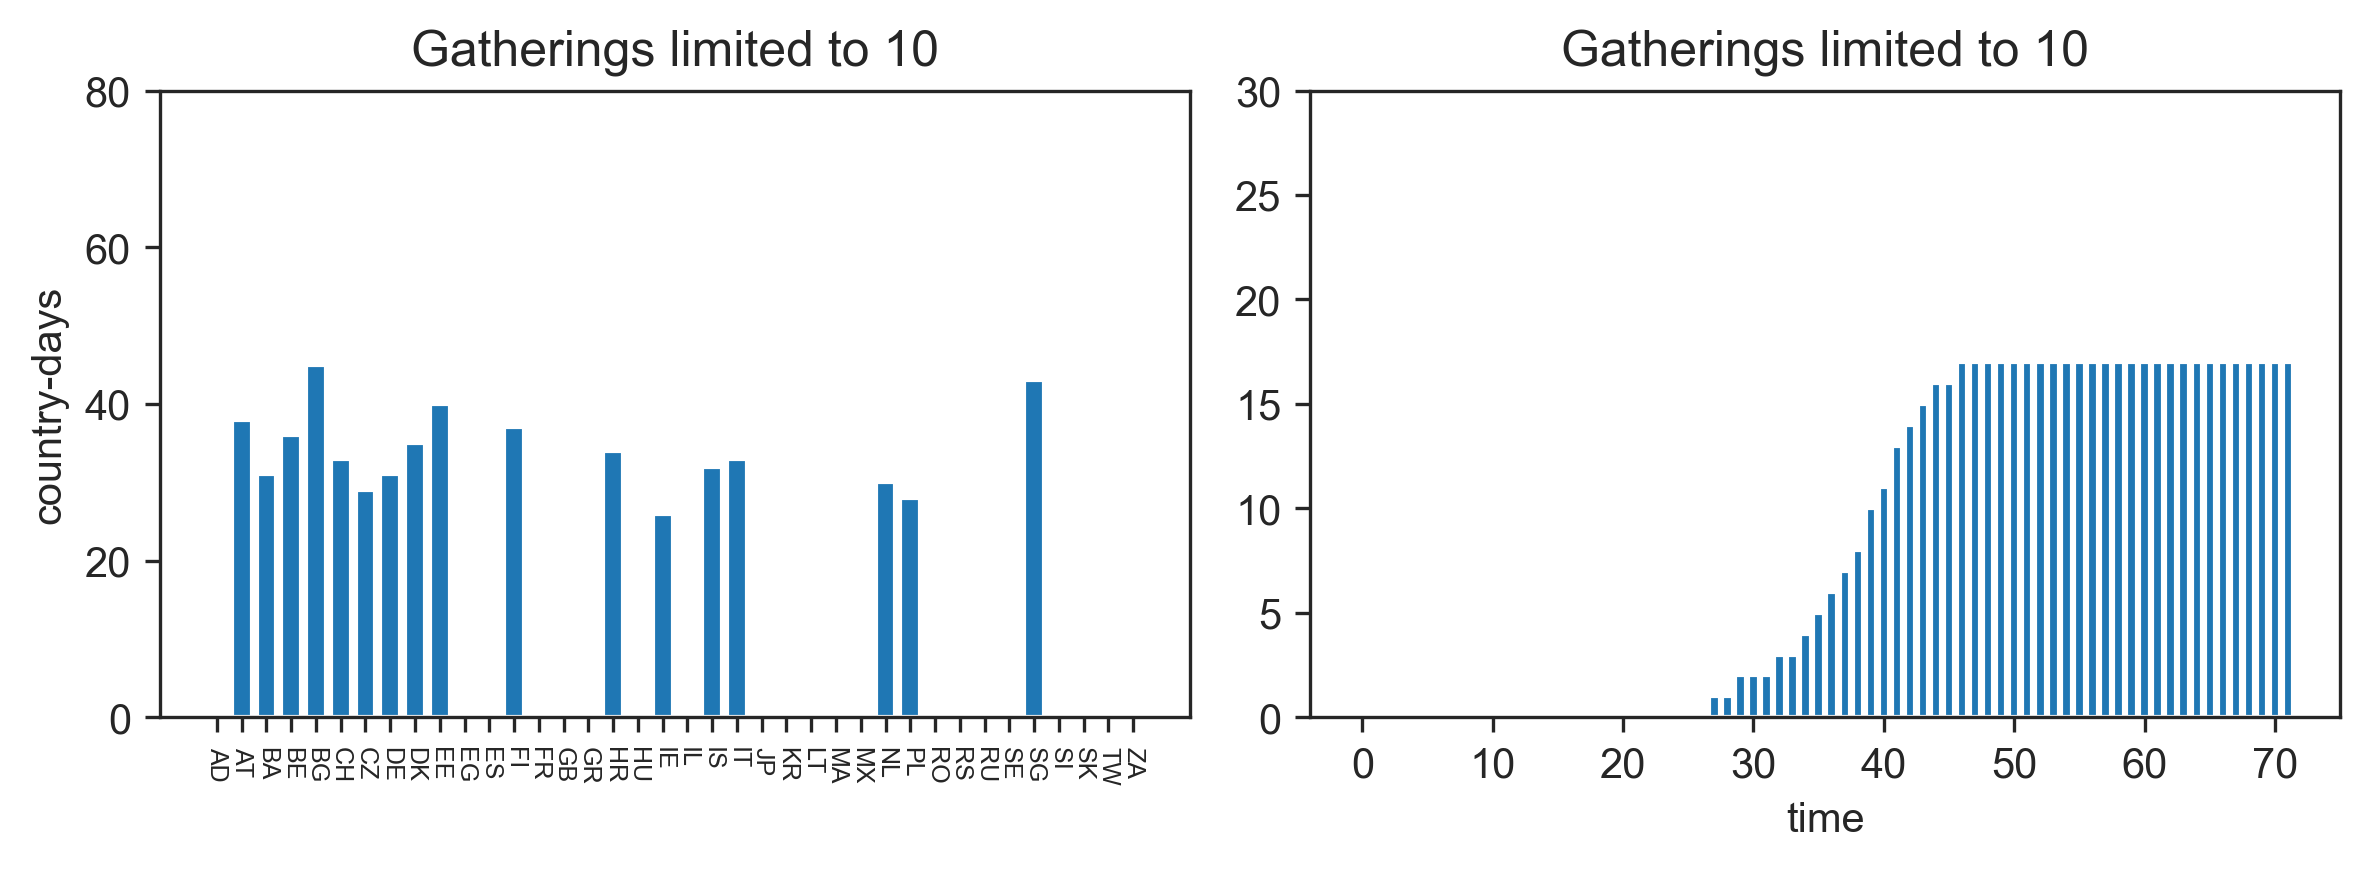

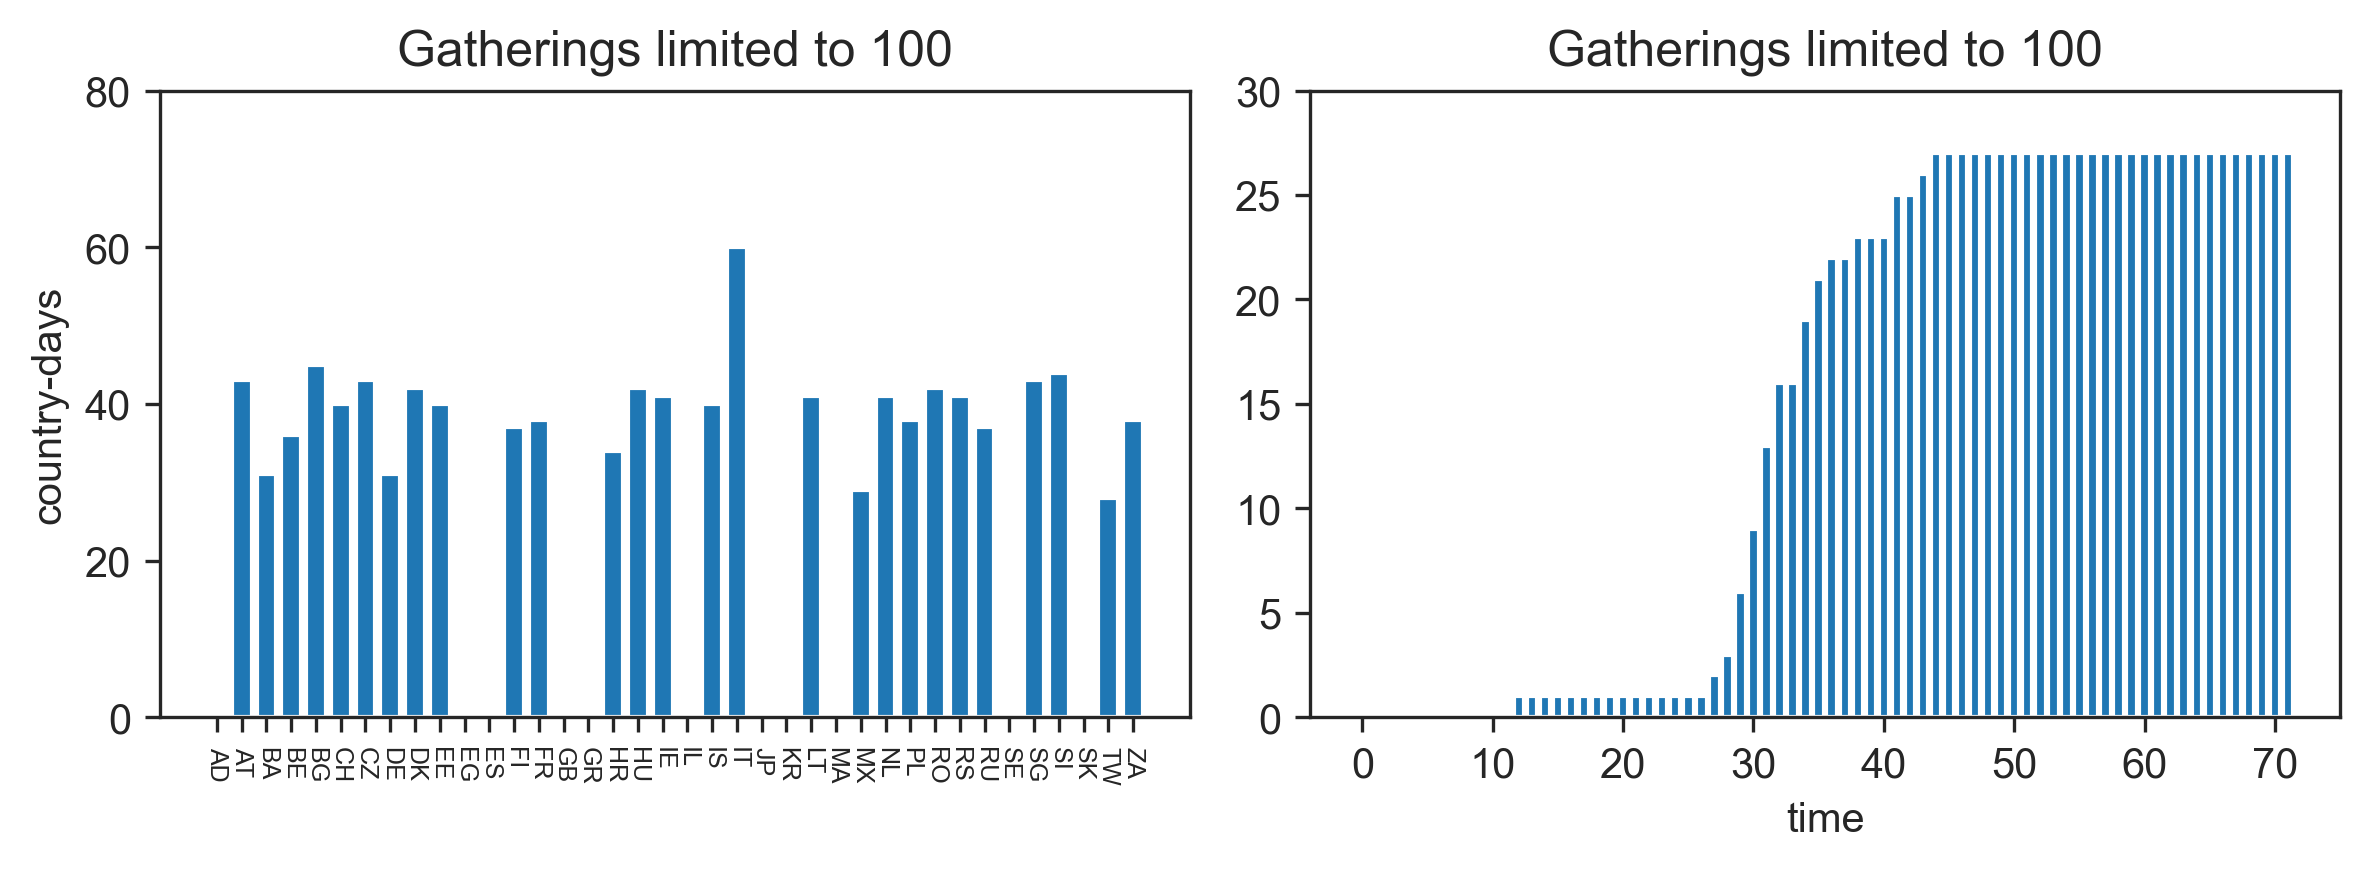

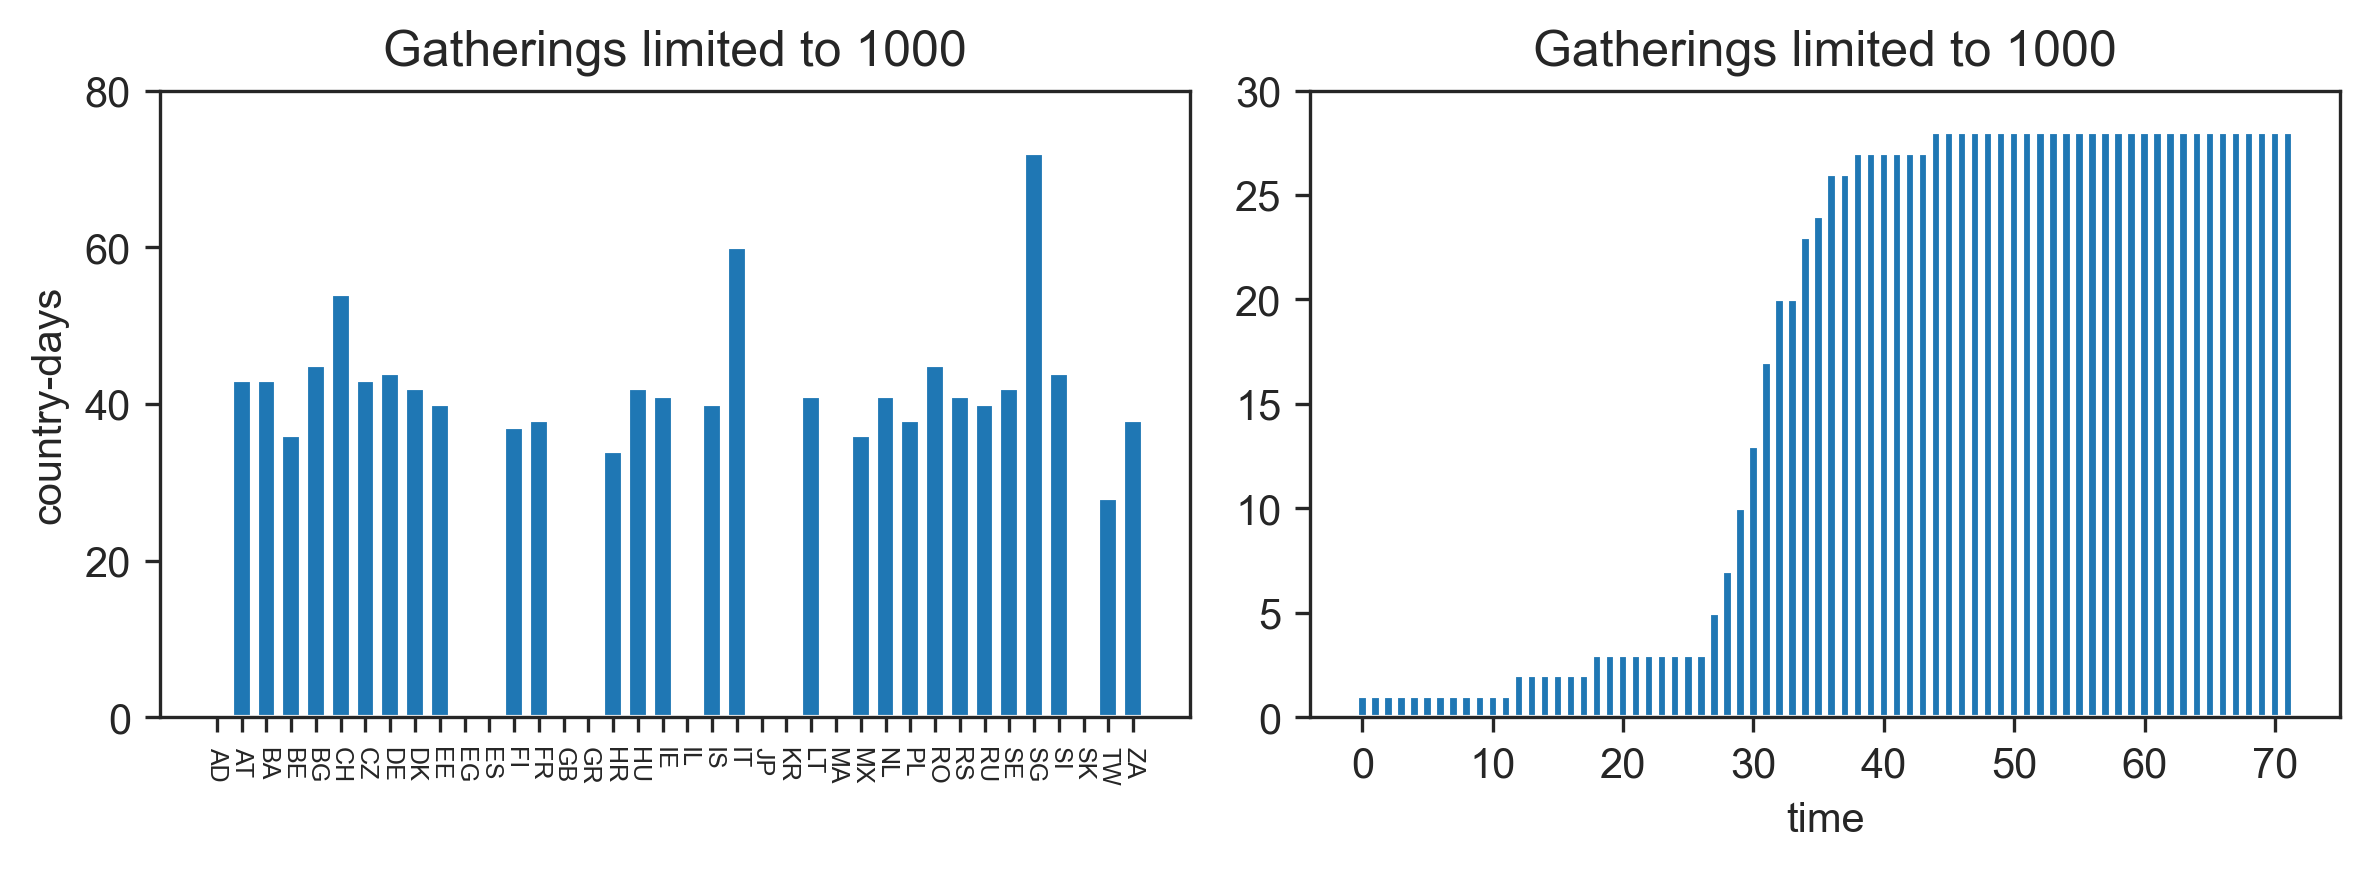

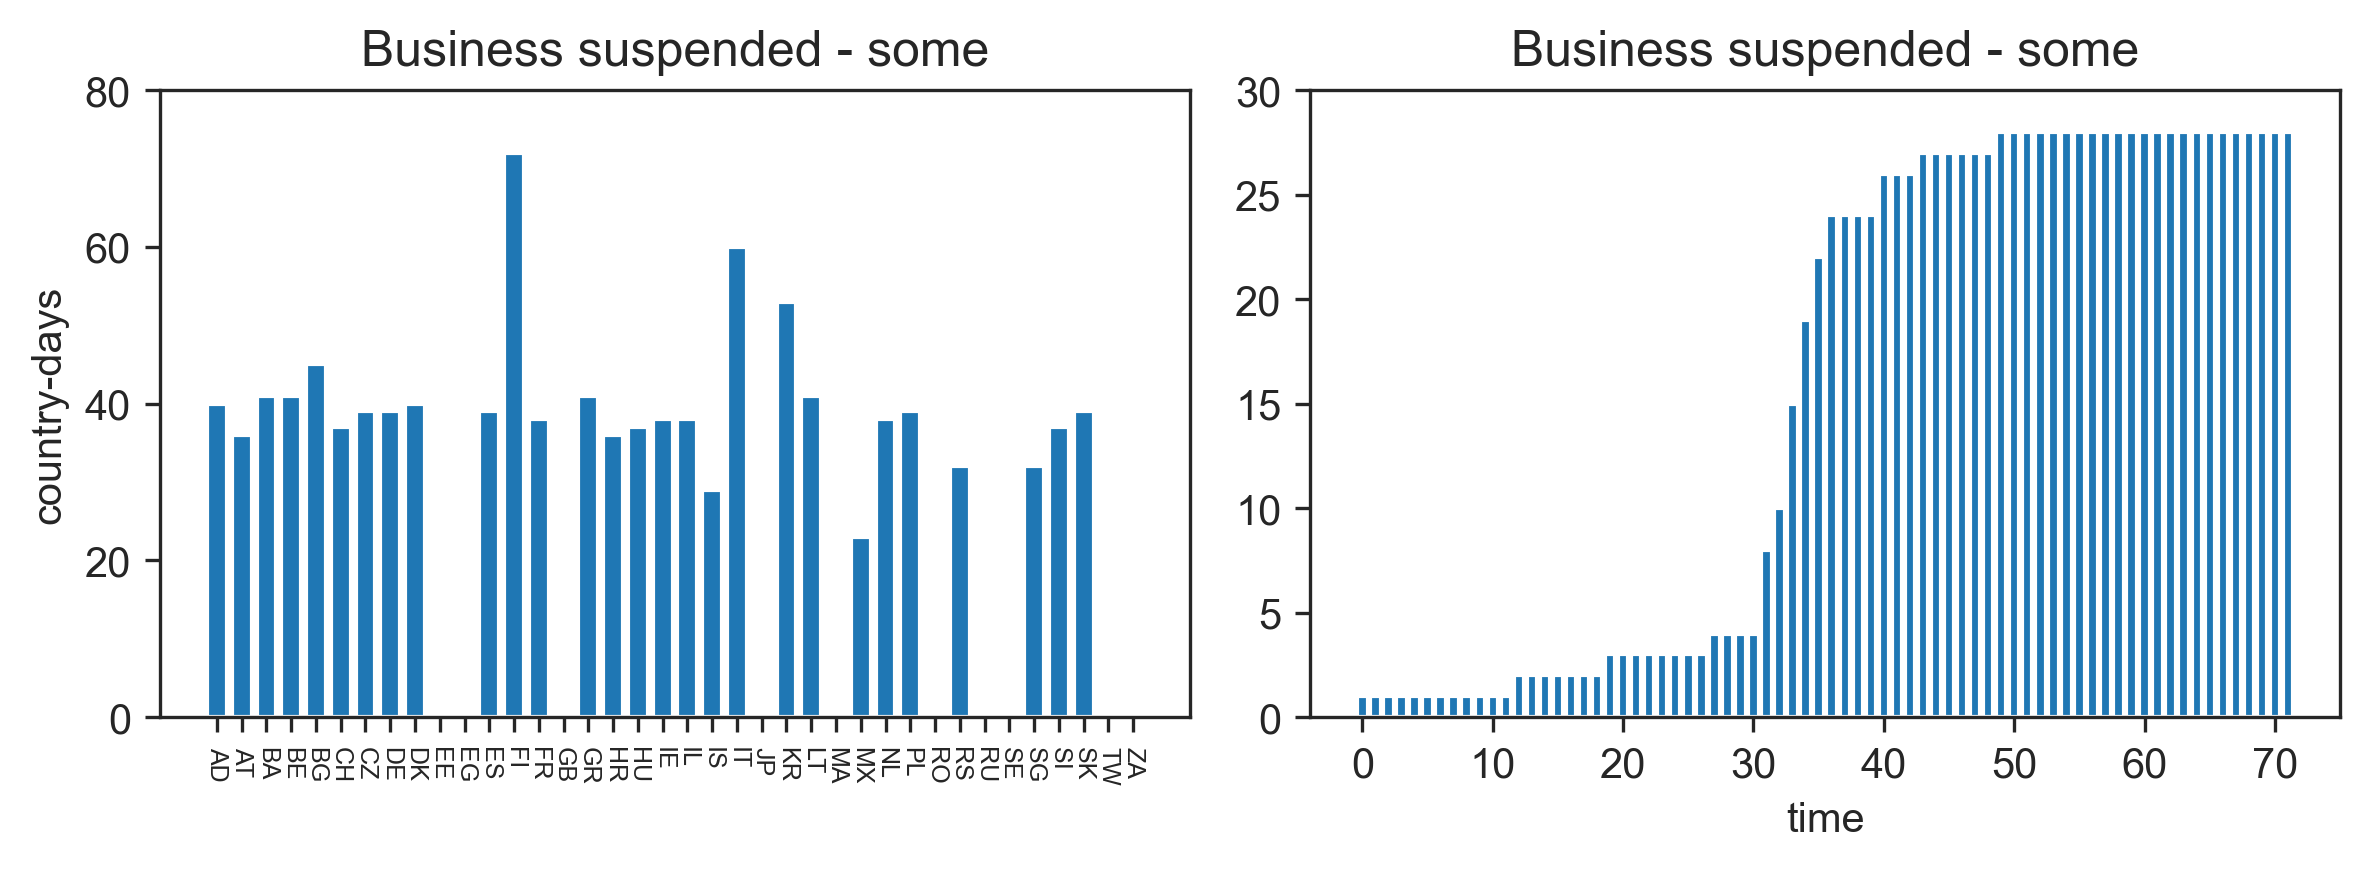

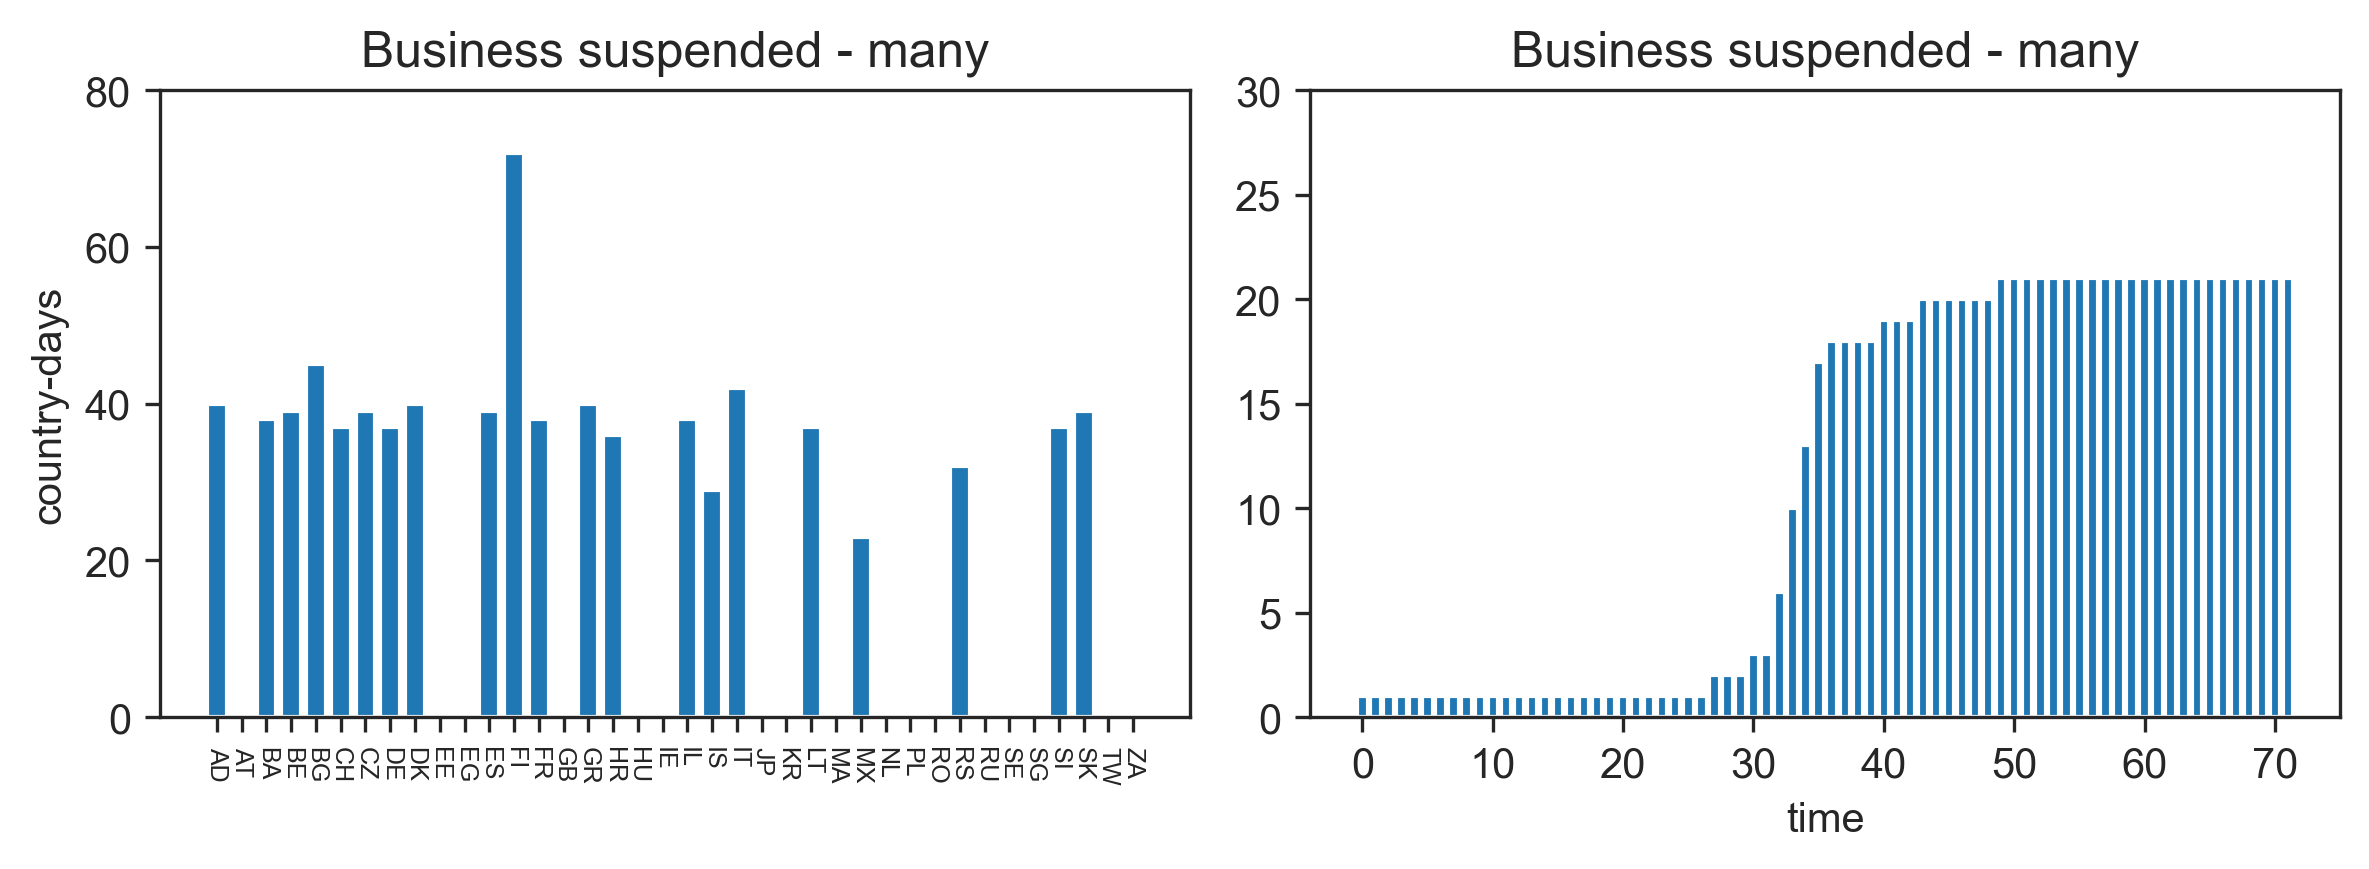

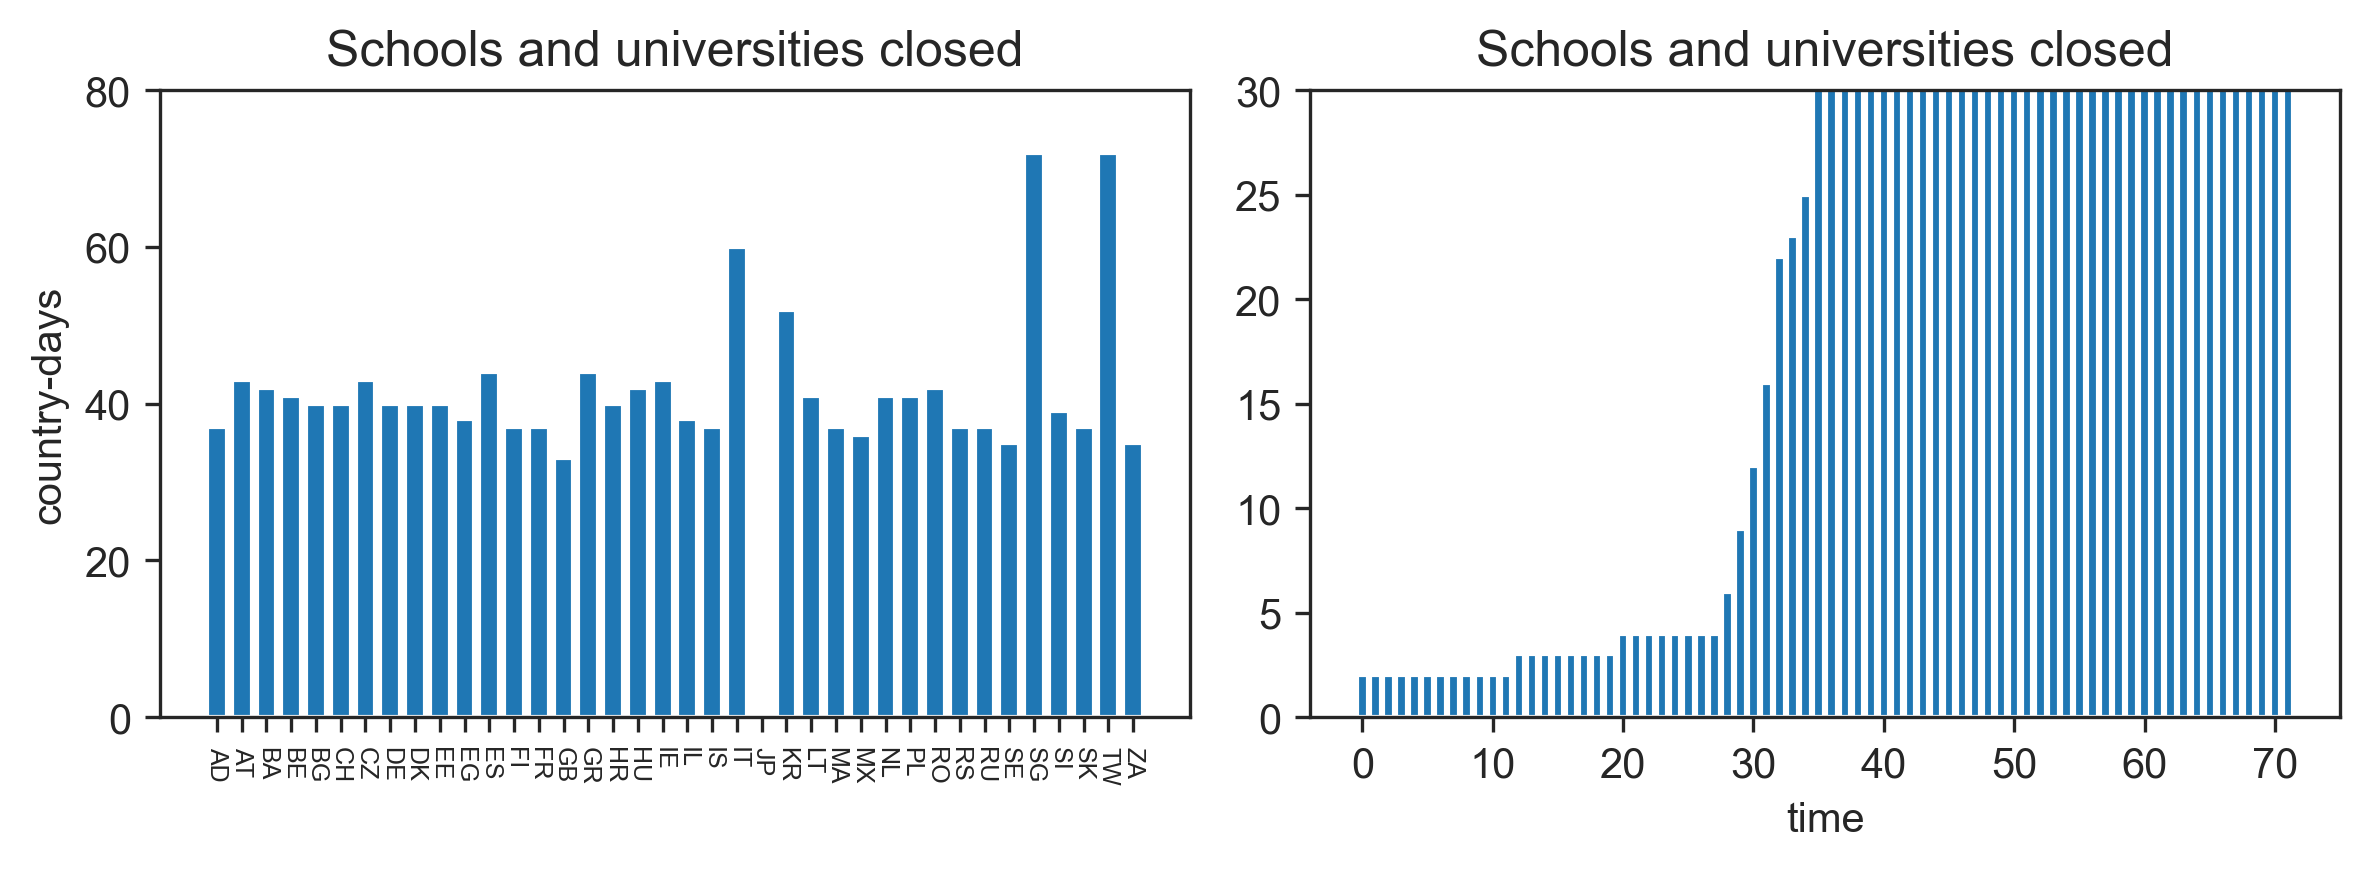

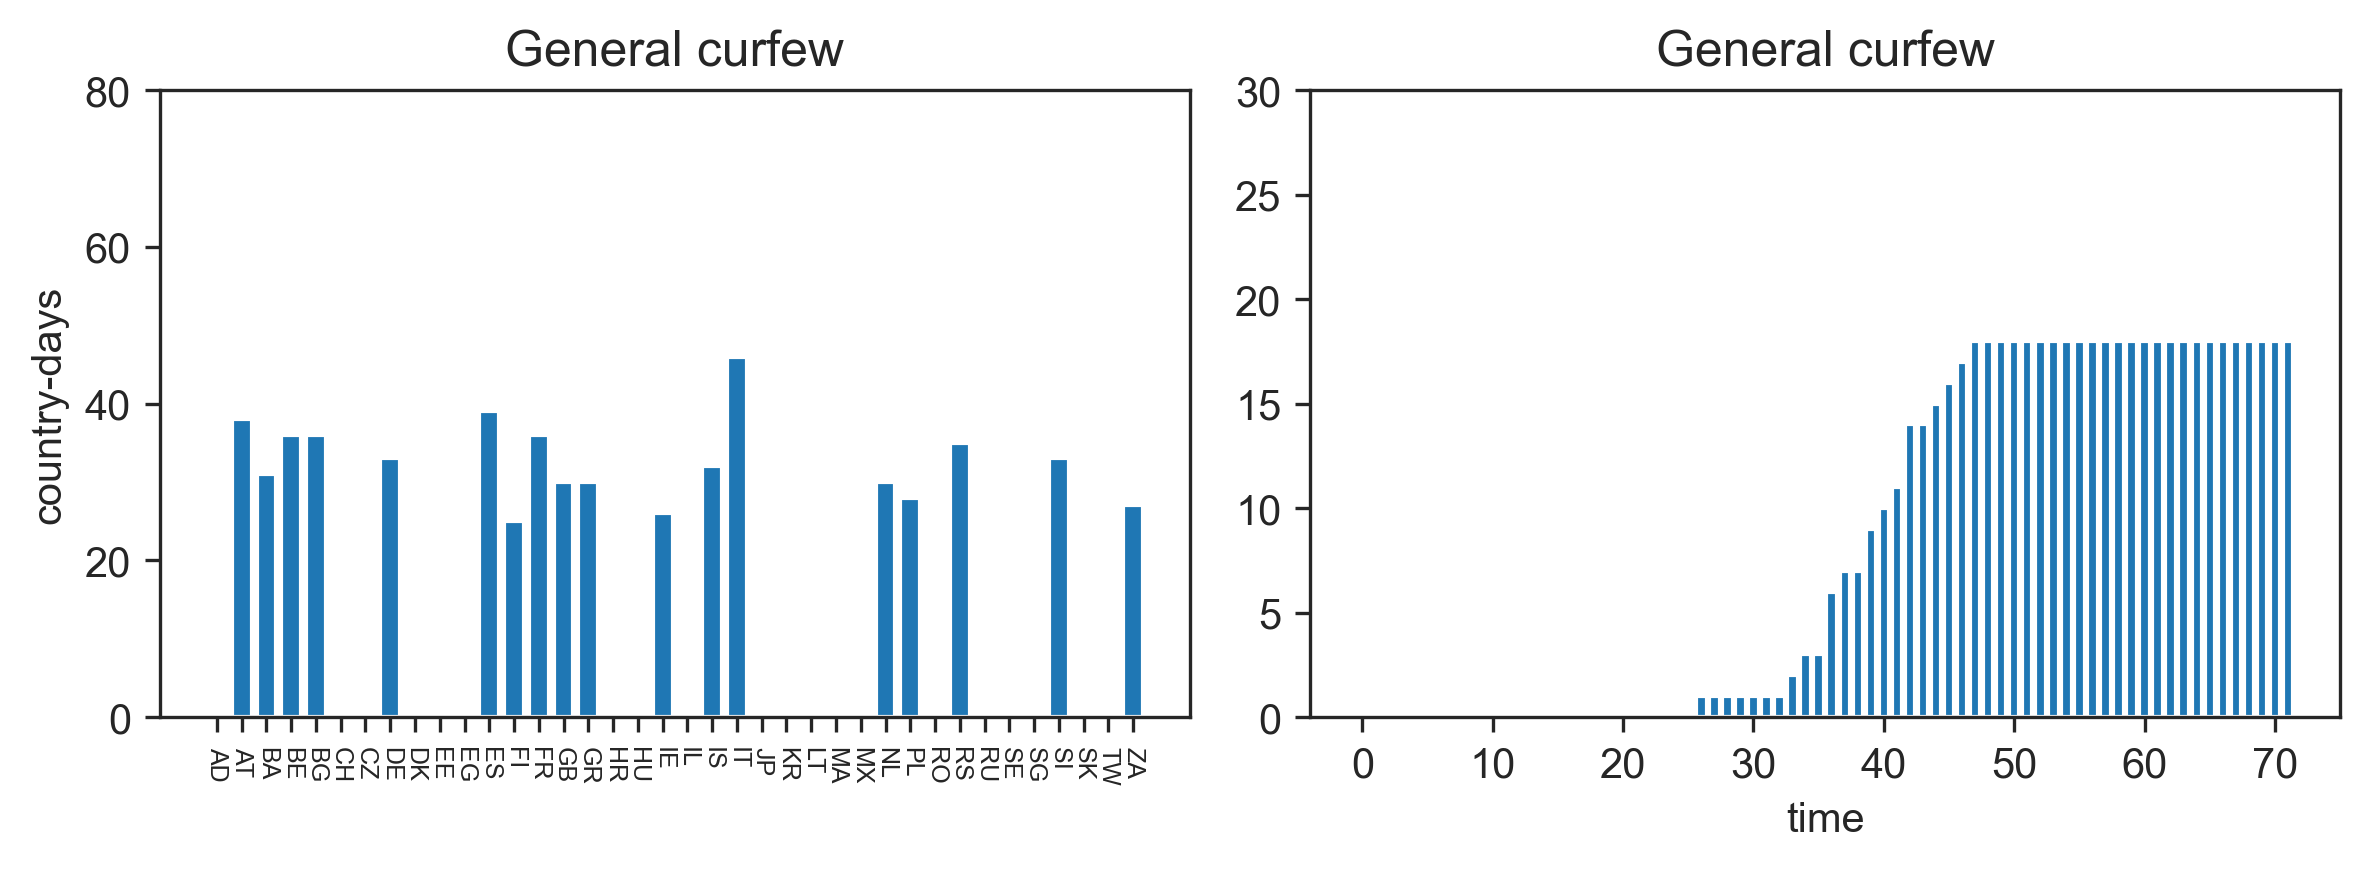

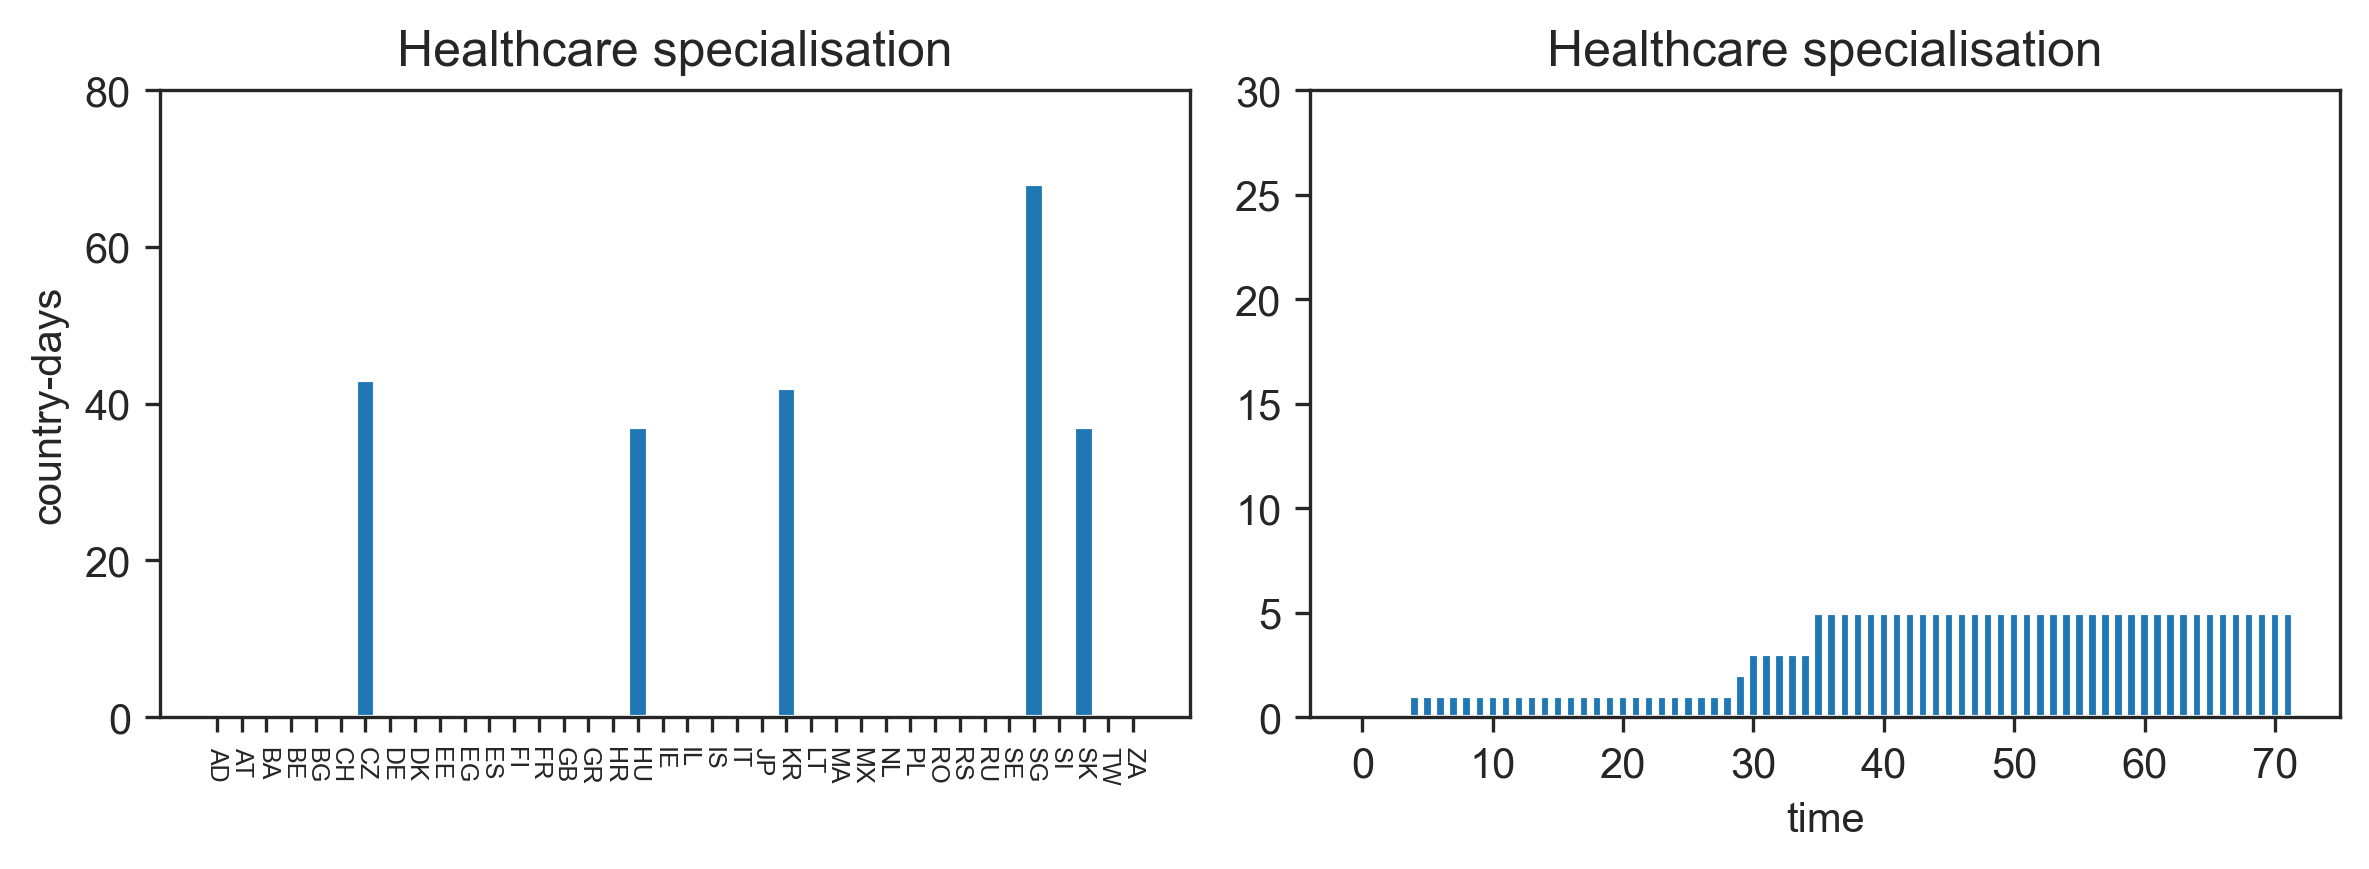

In [167]:
countries = data.Rs

for indx, cm in enumerate(features):
    hist_data = np.sum(data.ActiveCMs[:, indx, :], axis=1)
    plt.figure(figsize=(8, 3), dpi=300)
    plt.subplot(121)
    plt.bar(np.arange(len(countries)), hist_data)
    plt.xticks(np.arange(len(countries)), countries, rotation = -90, size=6)
    plt.ylim([0, 80])
    plt.ylabel("country-days")
    plt.title(cm)
    plt.subplot(122)
    hist_data = np.sum(data.ActiveCMs[:, indx, :], axis=0)
    plt.bar(np.arange(hist_data.size), hist_data)
    plt.title(cm)
    plt.ylim([0, 30])
    plt.xlabel("time")
    plt.tight_layout()

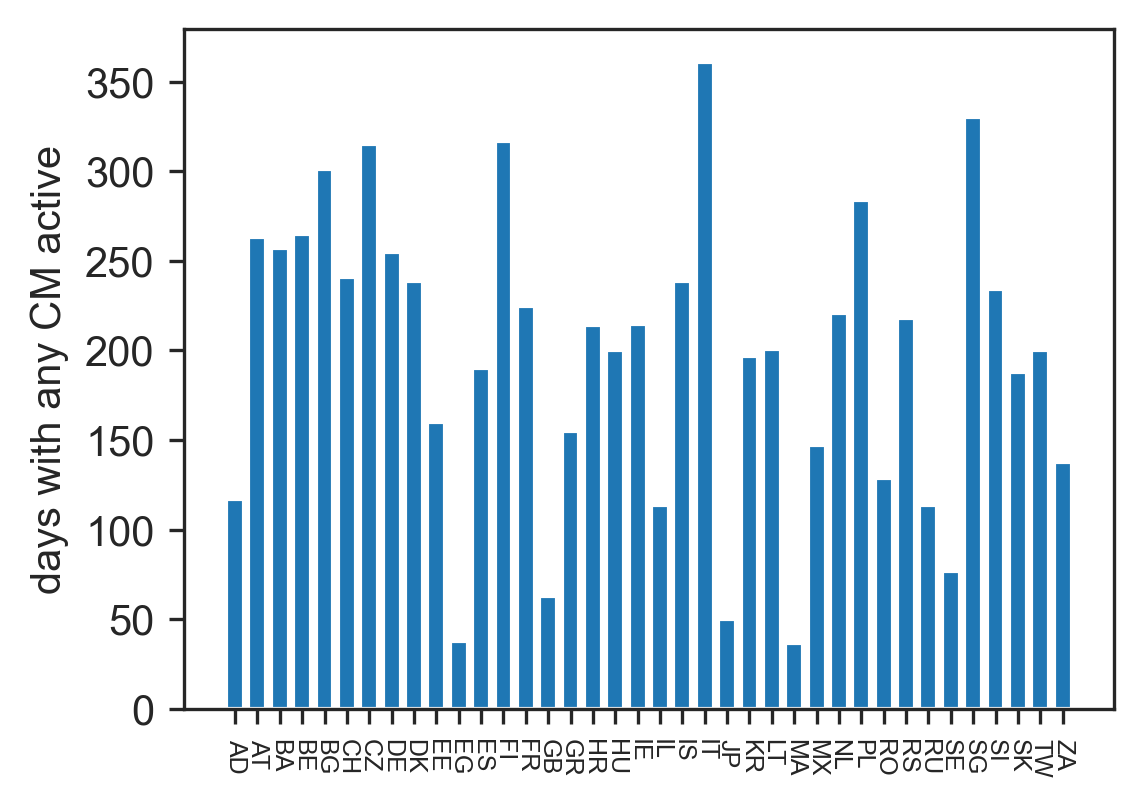

In [168]:
plt.figure(figsize=(4, 3), dpi=300)
cs = np.sum(np.sum(data.ActiveCMs, axis=-1), axis=-1)
plt.bar(np.arange(len(countries)), cs)
plt.xticks(np.arange(len(countries)), countries, rotation = -90, size=6)
plt.ylabel("days with any CM active");

In [169]:
data.ActiveCMs.shape

(38, 9, 72)

# Notes:

* why is nan a region

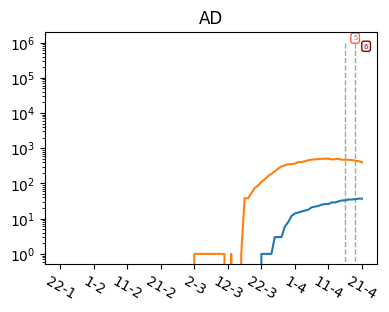

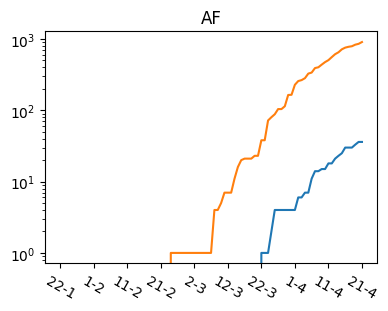

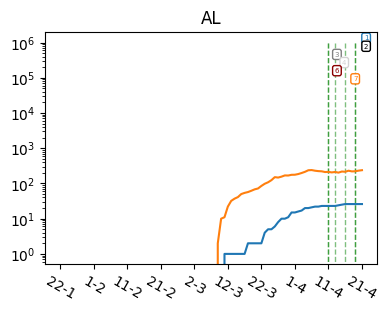

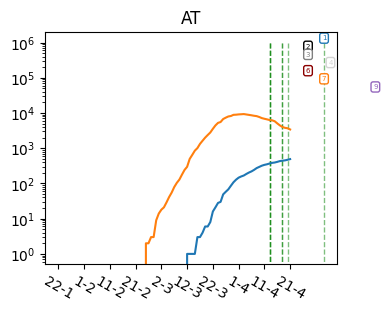

In [114]:
for region in unique_regions[:5]:
    if region in jh_regions:
        plt.figure(figsize=(4, 3), dpi=100)
        days = dp.johnhop_ds.loc[region].index
        n_days = len(days)
        plt.plot(np.arange(n_days), dp.johnhop_ds.loc[region]["Deaths"], label="deaths")
        plt.plot(np.arange(n_days), dp.johnhop_ds.loc[region]["Active"], label="active")
        locs = np.arange(0, n_days, 10)
        xlabels = [f"{days[ts].day}-{days[ts].month}" for ts in locs]
        plt.xticks(locs, xlabels, rotation=-30)
        ax = plt.gca()
        ax.set_yscale("log")
        
        colors = ["tab:blue", "black", "gray", "lightgray", "tomato", "darkred", "tab:orange", "tab:green",
                      "tab:purple"]
        height = 0
        
        CMs = dp.CM_dataset.loc[region].values.T
        nCMs, _ = CMs.shape
        CM_changes = CMs[:, 1:] - CMs[:, :-1]
        
        for cm in range(nCMs):
            changes = np.nonzero(CM_changes[cm, :])[0].tolist()
            for c in changes:
                height += 1
                if CM_changes[cm, c] == 1:
                    plt.plot([c, c], [0, 10 ** 6], "--g", alpha=0.5, linewidth=1, zorder=-2)
                    plt.text((c) / (n_days), 1 - (0.035 * (height)), f"{cm + 1}",
                             color=colors[cm],
                             transform=ax.transAxes, fontsize=5, backgroundcolor="white",
                             horizontalalignment="center", zorder=-1,
                             bbox=dict(facecolor='white', edgecolor=colors[cm], boxstyle='round'))
                else:
                    plt.plot([c, c], [0, 10 ** 6], "--r", alpha=0.5, linewidth=1, zorder=-2)
                    plt.text((c) / (n_days), 1 - (0.035 * (height)), f"{cm + 1}",
                             color=colors[cm],
                             transform=ax.transAxes, fontsize=5, backgroundcolor="white",
                             horizontalalignment="center", zorder=-1,
                             bbox=dict(facecolor='white', edgecolor=colors[cm], boxstyle='round'))
        plt.tight_layout()
        plt.title(region)